In [78]:
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import numpy as np

%matplotlib inline

In [114]:
def detect_edge(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 10, 200)
    edges = cv2.dilate(edges, None)
    edges = cv2.erode(edges, None)
    plt.imshow(edges, cmap='gray')  # Since we know it is a grayscale image
    return edges

def get_contour_areas(edge_img, n=4):
    contours, h = cv2.findContours(edge_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    contour_info = []
    for c in contours:
        contour_info.append((
            c,
            cv2.isContourConvex(c),
            cv2.contourArea(c),
        ))
    
    contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)[:n]
    return contour_info
    
def draw_bounding_boxes(img):
    edges = detect_edge(img)
    contour_info = get_contour_areas(edges, n=1)
    
    # This is one way to do, it gives results, but probably not a good way
    # Another way might be to use open cv's approxPolyDp and boundingRect functionality
    # An example for that - https://docs.opencv.org/3.4/da/d0c/tutorial_bounding_rects_circles.html
    for i, each_contour in enumerate(contour_info):
        con = np.squeeze(each_contour[0])
        s_i = [eachx[0] for eachx in con]
        s_j = [eachy[1] for eachy in con]
        x1 = min(s_i) - 5
        y1 = min(s_j) - 5
        x2 = max(s_i) + 5
        y2 = max(s_j) + 5
        cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
    
    plt.imshow(img)


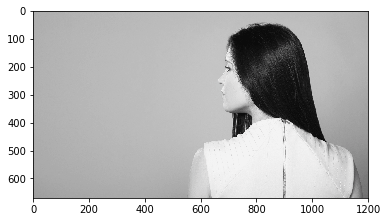

In [115]:
img = cv2.imread('banner.jpg')
plt.imshow(img)

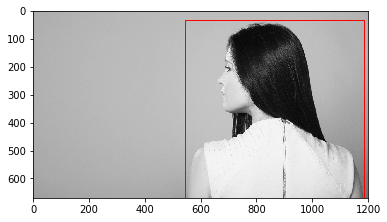

In [116]:
draw_bounding_boxes(img)